<a href="https://colab.research.google.com/github/bodarynka/pyton-data-analytycs/blob/main/%D0%94%D0%B0%D1%80%D0%B8%D0%BD%D0%B0_%D0%91%D0%BE%D1%8F%D0%BA%D1%96%D0%B2%D1%81%D1%8C%D0%BA%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 19.3 MB/s eta 0:00:00


In [2]:
import datetime
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
from mysql.connector.connection import MySQLConnection

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [4]:
sql = """
    SELECT hire_date
    FROM employees
"""

# Використовуємо pandas.read_sql для виконання запиту і збереження результатів у змінну df
df = pd.read_sql(sql, con)

# Перетворюємо колонку hire_date на рік (відокремлюємо лише рік з дати)
df['hire_year'] = pd.to_datetime(df['hire_date']).dt.year

# Групуємо за роком найму і рахуємо кількість співробітників
df_grouped = df.groupby('hire_year').size().reset_index(name='employee_count')

# Виводимо результат
print(df_grouped)

<ipython-input-4-1180ccb73b0e>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


    hire_year  employee_count
0        1985           35316
1        1986           36150
2        1987           33501
3        1988           31436
4        1989           28394
5        1990           25610
6        1991           22568
7        1992           20402
8        1993           17772
9        1994           14835
10       1995           12115
11       1996            9574
12       1997            6669
13       1998            4155
14       1999            1514
15       2000              13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

<ipython-input-7-e1c219f4ee10>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


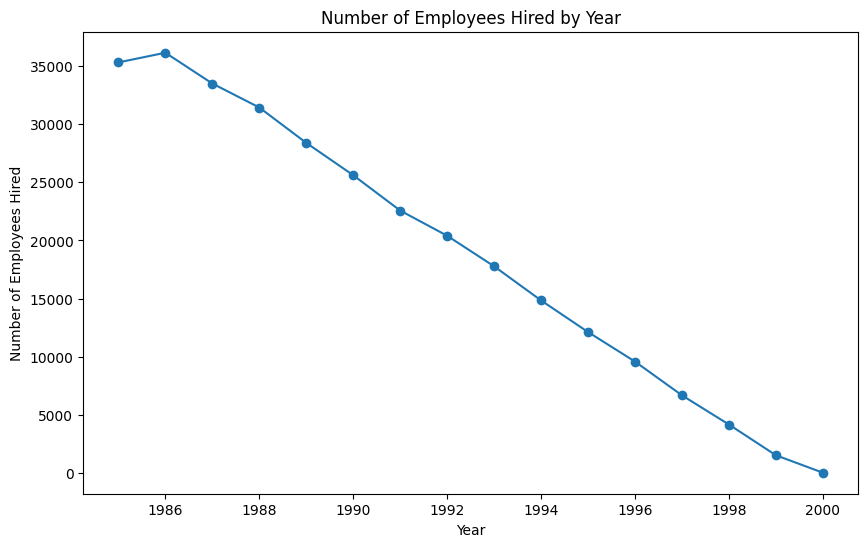

In [7]:
sql = """
SELECT
    EXTRACT(YEAR FROM hire_date) AS hire_year,
    COUNT(*) AS employees_hired
FROM
    employees
GROUP BY
    hire_year
ORDER BY
    hire_year;
"""

# Виконання SQL-запиту і завантаження результатів у DataFrame
df = pd.read_sql(sql, con)

# Перейменування колонок за необхідності
df.columns = ['Year', 'Employees Hired']

# Побудова лінійного графіку
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Employees Hired'], marker='o')

# Додавання заголовку та підписів осей
plt.title(
'Number of Employees Hired by Year')
plt.xlabel('Year')
plt.ylabel('Number of Employees Hired')

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [12]:
sql = """
SELECT
    emp_no,
    title,
    from_date,
    to_date,
    TIMESTAMPDIFF(YEAR, from_date, to_date) AS years_on_position
FROM
    titles
WHERE
    title = 'Engineer'
    AND to_date != '9999-01-01';
"""

df_years = pd.read_sql(sql , con)

# Виведення результату на екран
print(df_years);


<ipython-input-12-44cfada9c09d>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql , con)


       emp_no     title   from_date     to_date  years_on_position
0       10004  Engineer  1986-12-01  1995-12-01                  9
1       10009  Engineer  1990-02-18  1995-02-18                  5
2       10012  Engineer  1992-12-18  2000-12-18                  8
3       10018  Engineer  1987-04-03  1995-04-03                  8
4       10026  Engineer  1995-03-20  2001-03-19                  5
...       ...       ...         ...         ...                ...
84015  499972  Engineer  1989-11-23  1998-11-23                  9
84016  499984  Engineer  1989-07-30  1994-07-30                  5
84017  499994  Engineer  1993-02-22  1993-10-27                  0
84018  499996  Engineer  1996-05-13  2002-05-13                  6
84019  499997  Engineer  1987-08-30  1992-08-29                  4

[84020 rows x 5 columns]


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

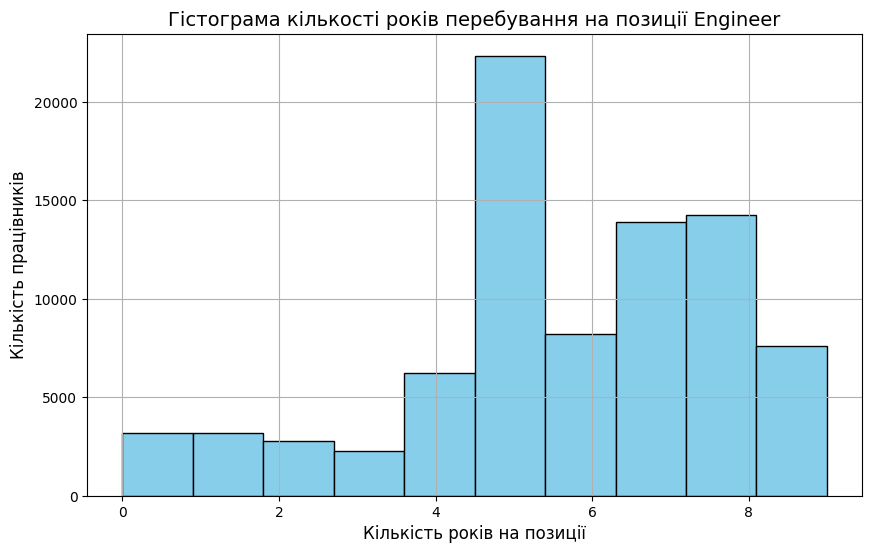

In [20]:
plt.figure(figsize=(
10, 6))  # Створення фігури для графіку

plt.hist(df_years['years_on_position'], bins=10, color='skyblue', edgecolor='black')  # Побудова гістограми

# Додавання заголовку і підписів для осей
plt.title('Гістограма кількості років перебування на позиції Engineer', fontsize=14)
plt.xlabel(
'Кількість років на позиції', fontsize=12)
plt.ylabel('Кількість працівників', fontsize=12)

# Відображення графіку
plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [21]:
con.close()